#                                           TECHNICAL SUPPORT DATA ANALYSIS

# to identify the major problems faced by the customers,time taken to resolve,and channel of support most suitable.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

#import sklearn.metrics

tech_supp_df = pd.read_csv("technical_support_data-2.csv")
tech_supp_df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [9]:
tech_supp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROBLEM_TYPE           23 non-null     object 
 1   no_of_cases            23 non-null     int64  
 2   Avg_pending_calls      23 non-null     float64
 3   Avg_resol_time         23 non-null     int64  
 4   recurrence_freq        23 non-null     float64
 5   Replace_percent        23 non-null     float64
 6   In_warranty_percent    23 non-null     int64  
 7   Post_warranty_percent  23 non-null     int64  
 8   GROUP                  23 non-null     int32  
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 1.7+ KB


In [10]:
tech_supp_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,1
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,1
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


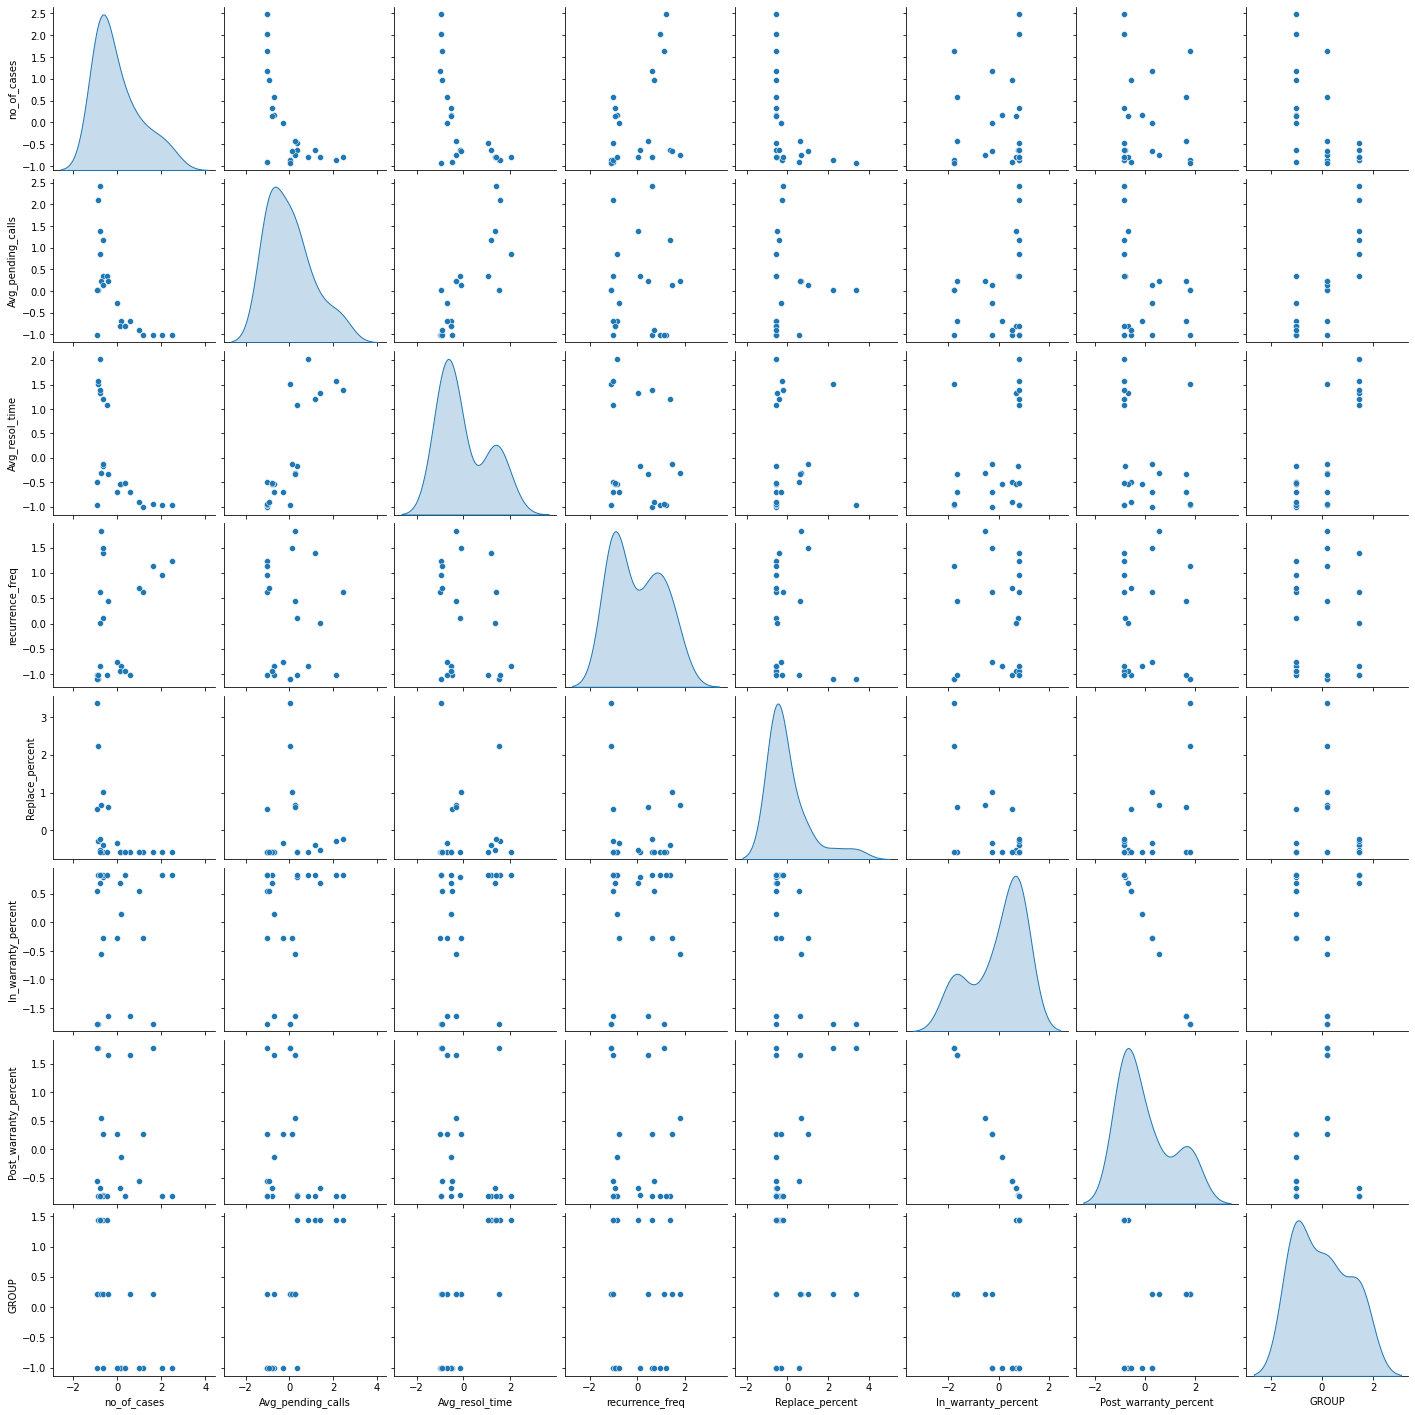

In [12]:
techSuppAttr=tech_supp_df.iloc[:,1:]   #removing the first column
techSuppScaled=techSuppAttr.apply(zscore)  #applying zscore
sns.pairplot(techSuppScaled,diag_kind='kde')  #pairplot

In [15]:
techSuppScaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no_of_cases            23 non-null     float64
 1   Avg_pending_calls      23 non-null     float64
 2   Avg_resol_time         23 non-null     float64
 3   recurrence_freq        23 non-null     float64
 4   Replace_percent        23 non-null     float64
 5   In_warranty_percent    23 non-null     float64
 6   Post_warranty_percent  23 non-null     float64
 7   GROUP                  23 non-null     float64
dtypes: float64(8)
memory usage: 1.6 KB


# if K-means has to be applied,we need to know no. of clusters,
# so,we'll go with the elbow test

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

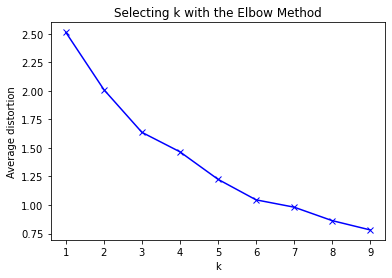

In [6]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(techSuppScaled)
    prediction=model.predict(techSuppScaled)
    meanDistortions.append(sum(np.min(cdist(techSuppScaled, model.cluster_centers_, 'euclidean'), axis=1)) / techSuppScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


## as it is not particularly clear,we shall check 3,5,6

In [8]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head(15)

Groups Assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,1
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,1
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,0
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,2
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,2
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,0
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40,0
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,2


# Analyze the distribution of the data among the two groups (K = 3). One of the most informative visual tool is boxplot.

In [16]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,229.900000,1.280000,24.000000,0.128000,0.024000,86.900000,13.100000
1,112.142857,1.828571,47.857143,0.165714,0.272857,20.714286,79.285714
2,33.333333,3.300000,145.666667,0.121667,0.025000,99.166667,0.833333


array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Replace_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

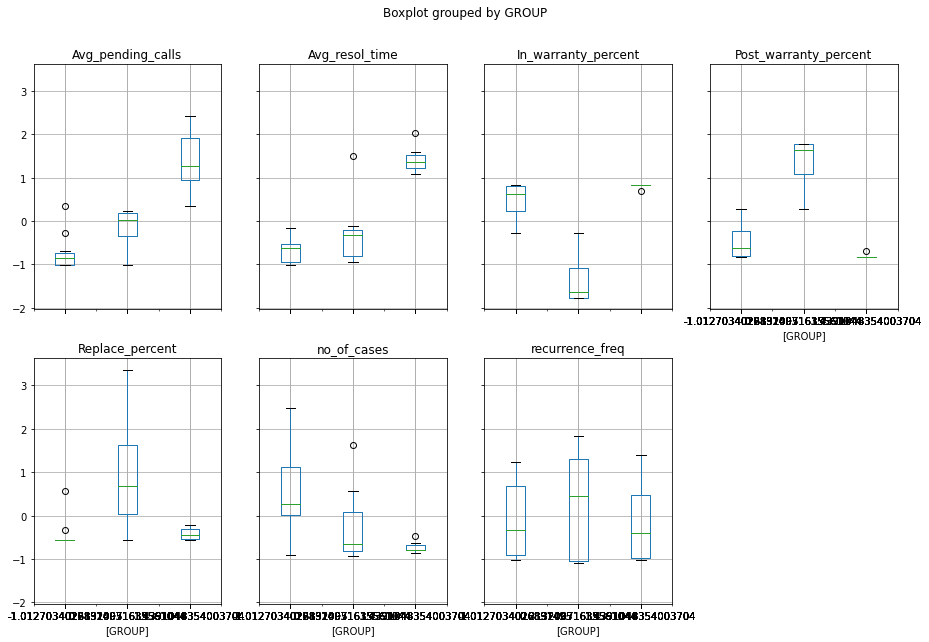

In [17]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [18]:
# Let us next start with K = 5
final_model=KMeans(5)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,4
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,4
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


In [ ]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.mean()

In [19]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,119.666667,1.450,34.833333,0.053333,0.040,86.500000,13.500000
1,154.000000,1.760,35.400000,0.228000,0.142,27.000000,73.000000
2,395.250000,1.025,7.750000,0.240000,0.000,87.500000,12.500000
3,33.333333,3.300,145.666667,0.121667,0.025,99.166667,0.833333
4,7.500000,2.000,79.000000,0.010000,0.600,5.000000,95.000000


array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Replace_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

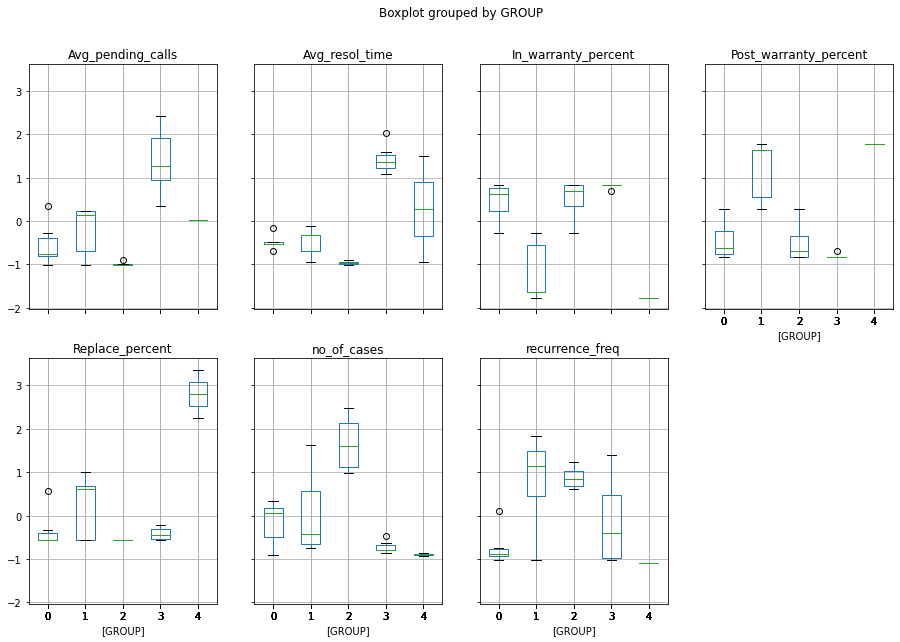

In [20]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [21]:
# let's check 6 too
final_model=KMeans(6)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,3
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,3
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Replace_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

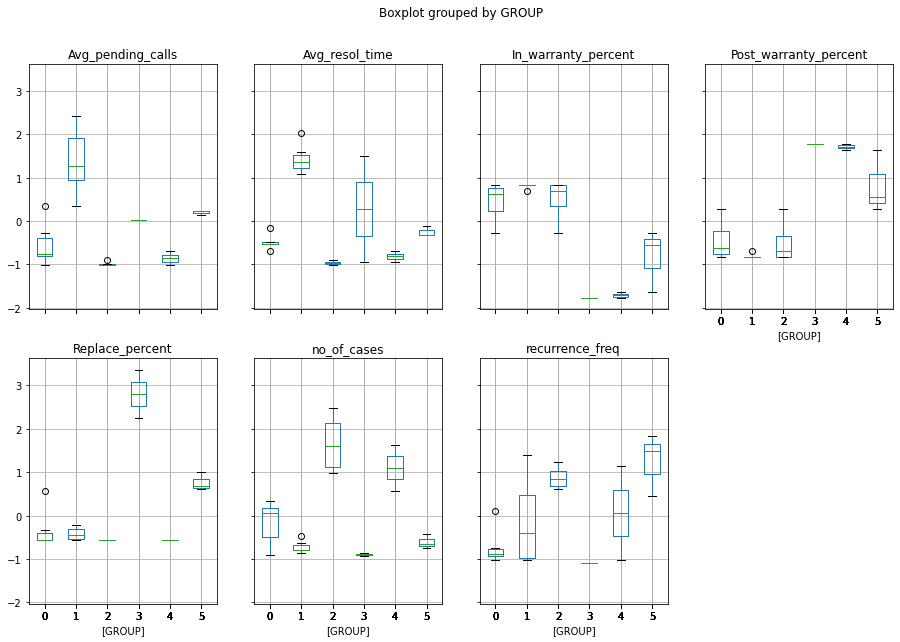

In [22]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

# as can be seen, the best no. of clusters is 3